Import dependencies and setting up graph

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')

In [2]:
dataset = pd.read_csv('/home/huseinzol05/AI/pokemon/Pokemon.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [3]:
dataset['newtype'] = dataset['Type 1'].rank(method = 'dense').astype(int)
dataset.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,newtype
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,10
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,10
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,10
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,10
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,7


In [4]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

X = dataset.ix[:, 4:-3].values
Y = dataset.ix[:, -2].values
print X

[[318  45  49 ...,  65  65  45]
 [405  60  62 ...,  80  80  60]
 [525  80  82 ..., 100 100  80]
 ..., 
 [600  80 110 ..., 150 130  70]
 [680  80 160 ..., 170 130  80]
 [600  80 110 ..., 130  90  70]]


Change boolean to int

In [6]:
Y = LabelEncoder().fit_transform(Y)

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [15]:
X = TSNE(n_components = 2).fit_transform(X)

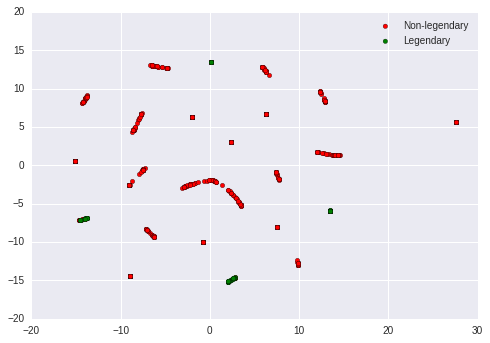

In [16]:
import numpy as np

label = ['Non-legendary', 'Legendary']
color = ['red', 'green']

for i, _ in enumerate(np.unique(Y)):
    plt.scatter(X[Y == i, 0], X[Y == i, 1], label = label[i], c = color[i])
    
plt.legend()
plt.show()